# Importing Necessary Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the Train data
train_df=pd.read_csv('Malignant_comment_train.csv')

test_df=pd.read_csv('malignant_comment_test.csv')

In [4]:
train_df.head(5)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
test_df['malignant']=np.nan
test_df['highly_malignant']=np.nan
test_df['rude']=np.nan
test_df['threat']=np.nan
test_df['abuse']=np.nan
test_df['loathe']=np.nan

In [7]:
#checking the dimension of the dataset
train_df.shape

(159571, 8)

In [8]:
test_df.shape

(153164, 8)

In [9]:
#concating two frames 
frames = [train_df,test_df]
df = pd.concat(frames, keys=['train', 'test'])

df

id  \
train 0       0000997932d777bf   
      1       000103f0d9cfb60f   
      2       000113f07ec002fd   
      3       0001b41b1c6bb37e   
      4       0001d958c54c6e35   
...                        ...   
test  153159  fffcd0960ee309b5   
      153160  fffd7a9a6eb32c16   
      153161  fffda9e8d6fafa9e   
      153162  fffe8f1340a79fc2   
      153163  ffffce3fb183ee80   

                                                   comment_text  malignant  \
train 0       Explanation\nWhy the edits made under my usern...        0.0   
      1       D'aww! He matches this background colour I'm s...        0.0   
      2       Hey man, I'm really not trying to edit war. It...        0.0   
      3       "\nMore\nI can't make any real suggestions on ...        0.0   
      4       You, sir, are my hero. Any chance you remember...        0.0   
...                                                         ...        ...   
test  153159  . \n i totally agree, this stuff is nothing bu...        NaN   
      153160  == Throw from out field to home plate. == \n\n...        NaN   
      153161  " \n\n == Okinotorishima categories == \n\n I ...        NaN   
      153162  " \n\n == ""One of the founding nations of the...        NaN   
      153163  " \n :::Stop already. Your bullshit is not wel...        NaN   

              highly_malignant  rude  threat  abuse  loathe  
train 0                    0.0   0.0     0.0    0.0     0.0  
      1                    0.0   0.0     0.0    0.0     0.0  
      2                    0.0   0.0     0.0    0.0     0.0  
      3                    0.0   0.0     0.0    0.0     0.0  
      4                    0.0   0.0     0.0    0.0     0.0  
...                        ...   ...     ...    ...     ...  
test  153159               NaN   NaN     NaN    NaN     NaN  
      153160               NaN   NaN     NaN    NaN     NaN  
      153161               NaN   NaN     NaN    NaN     NaN  
      153162               NaN   NaN     NaN    NaN     NaN  
      153163               NaN   NaN     NaN    NaN     NaN  

[312735 rows x 8 columns]

There are 1,59,571 rows and 8 columns

# checking for the Null values 

In [10]:
# checking it in train_dataset
train_df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [11]:
# the merged dataset
df.isnull().sum()

id                       0
comment_text             0
malignant           153164
highly_malignant    153164
rude                153164
threat              153164
abuse               153164
loathe              153164
dtype: int64

###### There are the  null values that are intentionally added in the test dataset

# Visualization of data

0.0    144277
1.0     15294
Name: malignant, dtype: int64


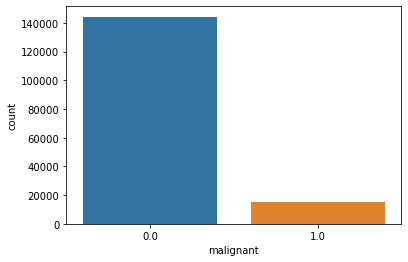

In [12]:
sns.countplot(df['malignant'])
print(df['malignant'].value_counts())

    There are 15,294  malignant comments

0.0    144277
1.0     15294
Name: malignant, dtype: int64


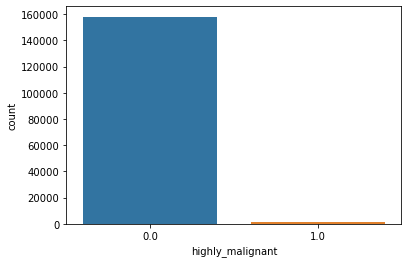

In [13]:
sns.countplot(df['highly_malignant'])
print(df['malignant'].value_counts())

There are 15,294  highly_malignant comments

0.0    151122
1.0      8449
Name: rude, dtype: int64


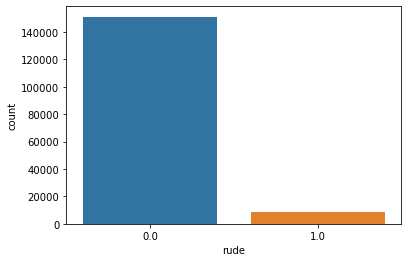

In [14]:
sns.countplot(df['rude'])
print(df['rude'].value_counts())

there are 8449 rude comments

0.0    159093
1.0       478
Name: threat, dtype: int64


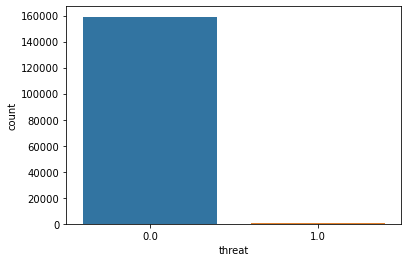

In [15]:
sns.countplot(df['threat'])
print(df['threat'].value_counts())

There are 478 threat comments

0.0    151694
1.0      7877
Name: abuse, dtype: int64


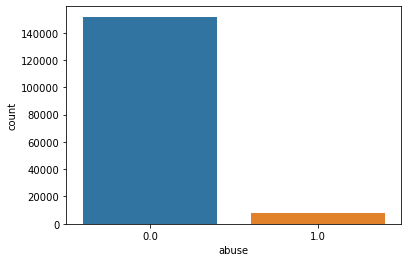

In [16]:
sns.countplot(df['abuse'])
print(df['abuse'].value_counts())

there are 7877 abuse comments

0.0    158166
1.0      1405
Name: loathe, dtype: int64


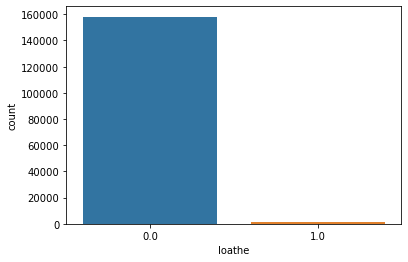

In [17]:
sns.countplot(df['loathe'])
print(df['loathe'].value_counts())

There are 1405 loathe comments

# Feature Engineering

In [18]:
# defining an extra column label to collect all one hot encoded columns of dataset into one single column as target for classification.
df['label']=0

###### We will now check all the columns and fill the label columns with it respectively

### malignant

In [19]:
# starting with malignant column
# checking the column where malignant is yes i.e., 1
df[df['malignant']==1]

id  \
train 6       0002bcb3da6cb337   
      12      0005c987bdfc9d4b   
      16      0007e25b2121310b   
      42      001810bf8c45bf5f   
      43      00190820581d90ce   
...                        ...   
      159494  fef4cf7ba0012866   
      159514  ff39a2895fc3b40e   
      159541  ffa33d3122b599d6   
      159546  ffb47123b2d82762   
      159554  ffbdbb0483ed0841   

                                                   comment_text  malignant  \
train 6            COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK        1.0   
      12      Hey... what is it..\n@ | talk .\nWhat is it......        1.0   
      16      Bye! \n\nDon't look, come or think of comming ...        1.0   
      42      You are gay or antisemmitian? \n\nArchangel WH...        1.0   
      43               FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!        1.0   
...                                                         ...        ...   
      159494  "\n\n our previous conversation \n\nyou fuckin...        1.0   
      159514                  YOU ARE A MISCHIEVIOUS PUBIC HAIR        1.0   
      159541  Your absurd edits \n\nYour absurd edits on gre...        1.0   
      159546  "\n\nHey listen don't you ever!!!! Delete my e...        1.0   
      159554  and i'm going to keep posting the stuff u dele...        1.0   

              highly_malignant  rude  threat  abuse  loathe  label  
train 6                    1.0   1.0     0.0    1.0     0.0      0  
      12                   0.0   0.0     0.0    0.0     0.0      0  
      16                   0.0   0.0     0.0    0.0     0.0      0  
      42                   0.0   1.0     0.0    1.0     1.0      0  
      43                   0.0   1.0     0.0    1.0     0.0      0  
...                        ...   ...     ...    ...     ...    ...  
      159494               0.0   1.0     0.0    1.0     1.0      0  
      159514               0.0   0.0     0.0    1.0     0.0      0  
      159541               0.0   1.0     0.0    1.0     0.0      0  
      159546               0.0   0.0     0.0    1.0     0.0      0  
      159554               0.0   1.0     0.0    1.0     0.0      0  

[15294 rows x 9 columns]

###### there are 15249 columns where malignant=1

###### filling the label column with 'malignant' where df['malignant']=1

In [20]:
# assigning the column label with malignant where malignant =1
for i in df[df['malignant']==1].index:
    #if df['label'][i] !='rude' and df['label'][i] !='threat' and df['label'][i]!='abuse' and df['label'][i]!='loathe':
        df['label'][i]='malignant'
    

In [21]:
# rechecking the change done
df[df['malignant']==1]

id  \
train 6       0002bcb3da6cb337   
      12      0005c987bdfc9d4b   
      16      0007e25b2121310b   
      42      001810bf8c45bf5f   
      43      00190820581d90ce   
...                        ...   
      159494  fef4cf7ba0012866   
      159514  ff39a2895fc3b40e   
      159541  ffa33d3122b599d6   
      159546  ffb47123b2d82762   
      159554  ffbdbb0483ed0841   

                                                   comment_text  malignant  \
train 6            COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK        1.0   
      12      Hey... what is it..\n@ | talk .\nWhat is it......        1.0   
      16      Bye! \n\nDon't look, come or think of comming ...        1.0   
      42      You are gay or antisemmitian? \n\nArchangel WH...        1.0   
      43               FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!        1.0   
...                                                         ...        ...   
      159494  "\n\n our previous conversation \n\nyou fuckin...        1.0   
      159514                  YOU ARE A MISCHIEVIOUS PUBIC HAIR        1.0   
      159541  Your absurd edits \n\nYour absurd edits on gre...        1.0   
      159546  "\n\nHey listen don't you ever!!!! Delete my e...        1.0   
      159554  and i'm going to keep posting the stuff u dele...        1.0   

              highly_malignant  rude  threat  abuse  loathe      label  
train 6                    1.0   1.0     0.0    1.0     0.0  malignant  
      12                   0.0   0.0     0.0    0.0     0.0  malignant  
      16                   0.0   0.0     0.0    0.0     0.0  malignant  
      42                   0.0   1.0     0.0    1.0     1.0  malignant  
      43                   0.0   1.0     0.0    1.0     0.0  malignant  
...                        ...   ...     ...    ...     ...        ...  
      159494               0.0   1.0     0.0    1.0     1.0  malignant  
      159514               0.0   0.0     0.0    1.0     0.0  malignant  
      159541               0.0   1.0     0.0    1.0     0.0  malignant  
      159546               0.0   0.0     0.0    1.0     0.0  malignant  
      159554               0.0   1.0     0.0    1.0     0.0  malignant  

[15294 rows x 9 columns]

In [22]:
# rechecking the column label we created
df['label'].value_counts()

0            297441
malignant     15294
Name: label, dtype: int64

### Highly Malignant

###### filling the label column with 'highly_malignant' where df['highly_malignant]=1

In [23]:
df[df['highly_malignant']==1]

id  \
train 6       0002bcb3da6cb337   
      55      0020e7119b96eeeb   
      181     006e87872c8b370c   
      442     01208d2b76624130   
      579     018663f910e0bfe6   
...                        ...   
      159096  f871b05d4caa6f20   
      159099  f885a3e2d779342e   
      159281  fb726deec64157bd   
      159312  fbf20e312cd4a78d   
      159400  fd052883fa6a8697   

                                                   comment_text  malignant  \
train 6            COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK        1.0   
      55      Stupid peace of shit stop deleting my stuff as...        1.0   
      181     you are a stupid fuck \n\nand your mother's cu...        1.0   
      442          Hi \n\nIm a fucking bitch.\n\n50.180.208.181        1.0   
      579     What a motherfucking piece of crap those fuckh...        1.0   
...                                                         ...        ...   
      159096  You filthy, stinking crow! \n\nI am back! Dirt...        1.0   
      159099  now\n\nyou fucking pathetic moron. \n\ncc:  Ji...        1.0   
      159281  LoL!! \n\nyou're GAY!! you will never know how...        1.0   
      159312  Walter Mercado \n\nAntonio, quite frankly, you...        1.0   
      159400  Shalom \n\nSemite, get the fuck out of here. I...        1.0   

              highly_malignant  rude  threat  abuse  loathe      label  
train 6                    1.0   1.0     0.0    1.0     0.0  malignant  
      55                   1.0   1.0     0.0    1.0     0.0  malignant  
      181                  1.0   1.0     0.0    1.0     0.0  malignant  
      442                  1.0   1.0     0.0    1.0     0.0  malignant  
      579                  1.0   1.0     0.0    1.0     0.0  malignant  
...                        ...   ...     ...    ...     ...        ...  
      159096               1.0   1.0     0.0    1.0     0.0  malignant  
      159099               1.0   1.0     0.0    1.0     0.0  malignant  
      159281               1.0   1.0     0.0    1.0     1.0  malignant  
      159312               1.0   1.0     0.0    1.0     0.0  malignant  
      159400               1.0   1.0     1.0    1.0     1.0  malignant  

[1595 rows x 9 columns]

there are 1598 columns where highly_malignant=1

In [24]:
# assigning the column label with rude where rude =1
for i in df[df['highly_malignant']==1].index:
    if df['label'][i]!='malignant':
        df['label'][i]='highly_malignant'
    

In [25]:
# rechecking the change done
df[df['highly_malignant']==1]

id  \
train 6       0002bcb3da6cb337   
      55      0020e7119b96eeeb   
      181     006e87872c8b370c   
      442     01208d2b76624130   
      579     018663f910e0bfe6   
...                        ...   
      159096  f871b05d4caa6f20   
      159099  f885a3e2d779342e   
      159281  fb726deec64157bd   
      159312  fbf20e312cd4a78d   
      159400  fd052883fa6a8697   

                                                   comment_text  malignant  \
train 6            COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK        1.0   
      55      Stupid peace of shit stop deleting my stuff as...        1.0   
      181     you are a stupid fuck \n\nand your mother's cu...        1.0   
      442          Hi \n\nIm a fucking bitch.\n\n50.180.208.181        1.0   
      579     What a motherfucking piece of crap those fuckh...        1.0   
...                                                         ...        ...   
      159096  You filthy, stinking crow! \n\nI am back! Dirt...        1.0   
      159099  now\n\nyou fucking pathetic moron. \n\ncc:  Ji...        1.0   
      159281  LoL!! \n\nyou're GAY!! you will never know how...        1.0   
      159312  Walter Mercado \n\nAntonio, quite frankly, you...        1.0   
      159400  Shalom \n\nSemite, get the fuck out of here. I...        1.0   

              highly_malignant  rude  threat  abuse  loathe      label  
train 6                    1.0   1.0     0.0    1.0     0.0  malignant  
      55                   1.0   1.0     0.0    1.0     0.0  malignant  
      181                  1.0   1.0     0.0    1.0     0.0  malignant  
      442                  1.0   1.0     0.0    1.0     0.0  malignant  
      579                  1.0   1.0     0.0    1.0     0.0  malignant  
...                        ...   ...     ...    ...     ...        ...  
      159096               1.0   1.0     0.0    1.0     0.0  malignant  
      159099               1.0   1.0     0.0    1.0     0.0  malignant  
      159281               1.0   1.0     0.0    1.0     1.0  malignant  
      159312               1.0   1.0     0.0    1.0     0.0  malignant  
      159400               1.0   1.0     1.0    1.0     1.0  malignant  

[1595 rows x 9 columns]

In [26]:
# rechecking the column label we created
df['label'].value_counts()

0            297441
malignant     15294
Name: label, dtype: int64

###### it has been found that where the comments are already malignant , there higly malignant is also 1 so it is not showing in the column of label

### Rude

###### filling the label column with 'rude' where train_df[rude]=1

In [27]:
# checking the rows where rude is 1
df[df['rude']==1]

id  \
train 6       0002bcb3da6cb337   
      42      001810bf8c45bf5f   
      43      00190820581d90ce   
      51      001dc38a83d420cf   
      55      0020e7119b96eeeb   
...                        ...   
      159411  fd2f53aafe8eefcc   
      159493  fef142420a215b90   
      159494  fef4cf7ba0012866   
      159541  ffa33d3122b599d6   
      159554  ffbdbb0483ed0841   

                                                   comment_text  malignant  \
train 6            COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK        1.0   
      42      You are gay or antisemmitian? \n\nArchangel WH...        1.0   
      43               FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!        1.0   
      51      GET FUCKED UP. GET FUCKEEED UP.  GOT A DRINK T...        1.0   
      55      Stupid peace of shit stop deleting my stuff as...        1.0   
...                                                         ...        ...   
      159411  Fat piece of shit \n\nyou obese piece of shit....        1.0   
      159493                         FUCKING FAGGOT \n\nLOLWAT.        1.0   
      159494  "\n\n our previous conversation \n\nyou fuckin...        1.0   
      159541  Your absurd edits \n\nYour absurd edits on gre...        1.0   
      159554  and i'm going to keep posting the stuff u dele...        1.0   

              highly_malignant  rude  threat  abuse  loathe      label  
train 6                    1.0   1.0     0.0    1.0     0.0  malignant  
      42                   0.0   1.0     0.0    1.0     1.0  malignant  
      43                   0.0   1.0     0.0    1.0     0.0  malignant  
      51                   0.0   1.0     0.0    0.0     0.0  malignant  
      55                   1.0   1.0     0.0    1.0     0.0  malignant  
...                        ...   ...     ...    ...     ...        ...  
      159411               0.0   1.0     0.0    1.0     0.0  malignant  
      159493               0.0   1.0     0.0    1.0     0.0  malignant  
      159494               0.0   1.0     0.0    1.0     1.0  malignant  
      159541               0.0   1.0     0.0    1.0     0.0  malignant  
      159554               0.0   1.0     0.0    1.0     0.0  malignant  

[8449 rows x 9 columns]

there are 8449 columns where rude=1

In [28]:
# assigning the column label with rude where rude =1 but labe not equal to malignant or highly malignant
for i in df[df['rude']==1].index:
    if df['label'][i]!='malignant' and df['label'][i]!='highly_malignant':
        df['label'][i]='rude'
    

In [29]:
# rechecking the change done
df[df['rude']==1]

id  \
train 6       0002bcb3da6cb337   
      42      001810bf8c45bf5f   
      43      00190820581d90ce   
      51      001dc38a83d420cf   
      55      0020e7119b96eeeb   
...                        ...   
      159411  fd2f53aafe8eefcc   
      159493  fef142420a215b90   
      159494  fef4cf7ba0012866   
      159541  ffa33d3122b599d6   
      159554  ffbdbb0483ed0841   

                                                   comment_text  malignant  \
train 6            COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK        1.0   
      42      You are gay or antisemmitian? \n\nArchangel WH...        1.0   
      43               FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!        1.0   
      51      GET FUCKED UP. GET FUCKEEED UP.  GOT A DRINK T...        1.0   
      55      Stupid peace of shit stop deleting my stuff as...        1.0   
...                                                         ...        ...   
      159411  Fat piece of shit \n\nyou obese piece of shit....        1.0   
      159493                         FUCKING FAGGOT \n\nLOLWAT.        1.0   
      159494  "\n\n our previous conversation \n\nyou fuckin...        1.0   
      159541  Your absurd edits \n\nYour absurd edits on gre...        1.0   
      159554  and i'm going to keep posting the stuff u dele...        1.0   

              highly_malignant  rude  threat  abuse  loathe      label  
train 6                    1.0   1.0     0.0    1.0     0.0  malignant  
      42                   0.0   1.0     0.0    1.0     1.0  malignant  
      43                   0.0   1.0     0.0    1.0     0.0  malignant  
      51                   0.0   1.0     0.0    0.0     0.0  malignant  
      55                   1.0   1.0     0.0    1.0     0.0  malignant  
...                        ...   ...     ...    ...     ...        ...  
      159411               0.0   1.0     0.0    1.0     0.0  malignant  
      159493               0.0   1.0     0.0    1.0     0.0  malignant  
      159494               0.0   1.0     0.0    1.0     1.0  malignant  
      159541               0.0   1.0     0.0    1.0     0.0  malignant  
      159554               0.0   1.0     0.0    1.0     0.0  malignant  

[8449 rows x 9 columns]

In [30]:
df['label'].value_counts()

0            296918
malignant     15294
rude            523
Name: label, dtype: int64

Though there were 8449 rows where rude ==1 but in that row if malignant =1 then that rows were not changed to rude , so there are 523 unique columns where rude =1

### Threat

###### filling the label column with 'threat' where df['threat]=1

In [31]:
df[df['threat']==1]

id  \
train 79      003217c3eb469ba9   
      176     006b94add72ed61c   
      600     0199d6af27b715f3   
      802     02230885017a50c5   
      1017    02c6e41e4b317ac3   
...                        ...   
      157718  e26b106943e02cbf   
      158717  f264b7fb9a4b4f53   
      158856  f4dca9e513e0366f   
      159029  f780e4f42aa5a344   
      159400  fd052883fa6a8697   

                                                   comment_text  malignant  \
train 79      Hi! I am back again!\nLast warning!\nStop undo...        1.0   
      176     I think that your a Fagget get a oife and burn...        1.0   
      600     I'm also a sock puppet of this account...SUPRI...        1.0   
      802     Fuck you, Smith. Please have me notified when ...        1.0   
      1017    WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...        1.0   
...                                                         ...        ...   
      157718  bitch \nyou are a fucking hore. you suck dick ...        1.0   
      158717  stupid head \n\nYOur dumb and you are stupid d...        1.0   
      158856  Hey \n\nhey faggot, are you dead yet? or are y...        1.0   
      159029                                Death to Musulmans!        1.0   
      159400  Shalom \n\nSemite, get the fuck out of here. I...        1.0   

              highly_malignant  rude  threat  abuse  loathe      label  
train 79                   0.0   0.0     1.0    0.0     0.0  malignant  
      176                  0.0   1.0     1.0    1.0     1.0  malignant  
      600                  0.0   0.0     1.0    0.0     0.0  malignant  
      802                  0.0   1.0     1.0    1.0     0.0  malignant  
      1017                 1.0   1.0     1.0    1.0     1.0  malignant  
...                        ...   ...     ...    ...     ...        ...  
      157718               0.0   1.0     1.0    1.0     1.0  malignant  
      158717               0.0   1.0     1.0    1.0     0.0  malignant  
      158856               1.0   1.0     1.0    1.0     0.0  malignant  
      159029               0.0   0.0     1.0    0.0     1.0  malignant  
      159400               1.0   1.0     1.0    1.0     1.0  malignant  

[478 rows x 9 columns]

there are 478 rows where threat =1

In [32]:
# assigning the column label with rude where rude =1
for i in df[df['threat']==1].index:
    if df['label'][i] !='rude'and df['label'][i]!='malignant':
        df['label'][i]='threat'
    

In [33]:
# rechecking the change done
df[df['threat']==1]

id  \
train 79      003217c3eb469ba9   
      176     006b94add72ed61c   
      600     0199d6af27b715f3   
      802     02230885017a50c5   
      1017    02c6e41e4b317ac3   
...                        ...   
      157718  e26b106943e02cbf   
      158717  f264b7fb9a4b4f53   
      158856  f4dca9e513e0366f   
      159029  f780e4f42aa5a344   
      159400  fd052883fa6a8697   

                                                   comment_text  malignant  \
train 79      Hi! I am back again!\nLast warning!\nStop undo...        1.0   
      176     I think that your a Fagget get a oife and burn...        1.0   
      600     I'm also a sock puppet of this account...SUPRI...        1.0   
      802     Fuck you, Smith. Please have me notified when ...        1.0   
      1017    WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...        1.0   
...                                                         ...        ...   
      157718  bitch \nyou are a fucking hore. you suck dick ...        1.0   
      158717  stupid head \n\nYOur dumb and you are stupid d...        1.0   
      158856  Hey \n\nhey faggot, are you dead yet? or are y...        1.0   
      159029                                Death to Musulmans!        1.0   
      159400  Shalom \n\nSemite, get the fuck out of here. I...        1.0   

              highly_malignant  rude  threat  abuse  loathe      label  
train 79                   0.0   0.0     1.0    0.0     0.0  malignant  
      176                  0.0   1.0     1.0    1.0     1.0  malignant  
      600                  0.0   0.0     1.0    0.0     0.0  malignant  
      802                  0.0   1.0     1.0    1.0     0.0  malignant  
      1017                 1.0   1.0     1.0    1.0     1.0  malignant  
...                        ...   ...     ...    ...     ...        ...  
      157718               0.0   1.0     1.0    1.0     1.0  malignant  
      158717               0.0   1.0     1.0    1.0     0.0  malignant  
      158856               1.0   1.0     1.0    1.0     0.0  malignant  
      159029               0.0   0.0     1.0    0.0     1.0  malignant  
      159400               1.0   1.0     1.0    1.0     1.0  malignant  

[478 rows x 9 columns]

In [34]:
# rechecking the changes occured to the label column
df['label'].value_counts()

0            296893
malignant     15294
rude            523
threat           25
Name: label, dtype: int64

Though there were 8449 rows where rude ==1 but in that row if malignant =1, or rude=1 then that rows were not changed to threat , so there are 25 unique columns where threat =1 

### Abuse

###### filling the label column with 'abuse' where df['abuse ']=1

In [35]:
df[df['abuse']==1]

id  \
train 6       0002bcb3da6cb337   
      42      001810bf8c45bf5f   
      43      00190820581d90ce   
      55      0020e7119b96eeeb   
      56      0020fd96ed3b8c8b   
...                        ...   
      159494  fef4cf7ba0012866   
      159514  ff39a2895fc3b40e   
      159541  ffa33d3122b599d6   
      159546  ffb47123b2d82762   
      159554  ffbdbb0483ed0841   

                                                   comment_text  malignant  \
train 6            COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK        1.0   
      42      You are gay or antisemmitian? \n\nArchangel WH...        1.0   
      43               FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!        1.0   
      55      Stupid peace of shit stop deleting my stuff as...        1.0   
      56      =Tony Sidaway is obviously a fistfuckee. He lo...        1.0   
...                                                         ...        ...   
      159494  "\n\n our previous conversation \n\nyou fuckin...        1.0   
      159514                  YOU ARE A MISCHIEVIOUS PUBIC HAIR        1.0   
      159541  Your absurd edits \n\nYour absurd edits on gre...        1.0   
      159546  "\n\nHey listen don't you ever!!!! Delete my e...        1.0   
      159554  and i'm going to keep posting the stuff u dele...        1.0   

              highly_malignant  rude  threat  abuse  loathe      label  
train 6                    1.0   1.0     0.0    1.0     0.0  malignant  
      42                   0.0   1.0     0.0    1.0     1.0  malignant  
      43                   0.0   1.0     0.0    1.0     0.0  malignant  
      55                   1.0   1.0     0.0    1.0     0.0  malignant  
      56                   0.0   1.0     0.0    1.0     0.0  malignant  
...                        ...   ...     ...    ...     ...        ...  
      159494               0.0   1.0     0.0    1.0     1.0  malignant  
      159514               0.0   0.0     0.0    1.0     0.0  malignant  
      159541               0.0   1.0     0.0    1.0     0.0  malignant  
      159546               0.0   0.0     0.0    1.0     0.0  malignant  
      159554               0.0   1.0     0.0    1.0     0.0  malignant  

[7877 rows x 9 columns]

there are 7877 columns where abuse=1

In [36]:
# assigning the column label with abuse where abuse =1
for i in df[df['abuse']==1].index:
    if df['label'][i] !='rude' and df['label'][i] !='threat'and df['label'][i]!='malignant':
        df['label'][i]='abuse'
    

In [37]:
# rechecking the change done
df[df['abuse']==1]

id  \
train 6       0002bcb3da6cb337   
      42      001810bf8c45bf5f   
      43      00190820581d90ce   
      55      0020e7119b96eeeb   
      56      0020fd96ed3b8c8b   
...                        ...   
      159494  fef4cf7ba0012866   
      159514  ff39a2895fc3b40e   
      159541  ffa33d3122b599d6   
      159546  ffb47123b2d82762   
      159554  ffbdbb0483ed0841   

                                                   comment_text  malignant  \
train 6            COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK        1.0   
      42      You are gay or antisemmitian? \n\nArchangel WH...        1.0   
      43               FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!        1.0   
      55      Stupid peace of shit stop deleting my stuff as...        1.0   
      56      =Tony Sidaway is obviously a fistfuckee. He lo...        1.0   
...                                                         ...        ...   
      159494  "\n\n our previous conversation \n\nyou fuckin...        1.0   
      159514                  YOU ARE A MISCHIEVIOUS PUBIC HAIR        1.0   
      159541  Your absurd edits \n\nYour absurd edits on gre...        1.0   
      159546  "\n\nHey listen don't you ever!!!! Delete my e...        1.0   
      159554  and i'm going to keep posting the stuff u dele...        1.0   

              highly_malignant  rude  threat  abuse  loathe      label  
train 6                    1.0   1.0     0.0    1.0     0.0  malignant  
      42                   0.0   1.0     0.0    1.0     1.0  malignant  
      43                   0.0   1.0     0.0    1.0     0.0  malignant  
      55                   1.0   1.0     0.0    1.0     0.0  malignant  
      56                   0.0   1.0     0.0    1.0     0.0  malignant  
...                        ...   ...     ...    ...     ...        ...  
      159494               0.0   1.0     0.0    1.0     1.0  malignant  
      159514               0.0   0.0     0.0    1.0     0.0  malignant  
      159541               0.0   1.0     0.0    1.0     0.0  malignant  
      159546               0.0   0.0     0.0    1.0     0.0  malignant  
      159554               0.0   1.0     0.0    1.0     0.0  malignant  

[7877 rows x 9 columns]

In [38]:
df['label'].value_counts()

0            296564
malignant     15294
rude            523
abuse           329
threat           25
Name: label, dtype: int64

Though there were 7877 rows where abuse ==1 but in that row if malignant =1 or rude=1, or threat=1 then that rows were not changed to abuse , so there are 329 unique rows where abuse=1

### Loathe

#### filling the label column with 'loathe' where df['loathe']=1

In [39]:
df[df['loathe']==1]

id  \
train 42      001810bf8c45bf5f   
      105     00472b8e2d38d1ea   
      176     006b94add72ed61c   
      218     008e0818dde894fb   
      238     0097dd5c29bf7a15   
...                        ...   
      159281  fb726deec64157bd   
      159336  fc3efa2f6f025f6d   
      159400  fd052883fa6a8697   
      159449  fdce660ddcd6d7ca   
      159494  fef4cf7ba0012866   

                                                   comment_text  malignant  \
train 42      You are gay or antisemmitian? \n\nArchangel WH...        1.0   
      105            A pair of jew-hating weiner nazi schmucks.        1.0   
      176     I think that your a Fagget get a oife and burn...        1.0   
      218     Kill all niggers. \n\nI have hard, that others...        1.0   
      238     u r a tw@ fuck off u gay boy.U r smelly.Fuck u...        1.0   
...                                                         ...        ...   
      159281  LoL!! \n\nyou're GAY!! you will never know how...        1.0   
      159336  Oh, fuck off. The pansy Jew would just whine a...        1.0   
      159400  Shalom \n\nSemite, get the fuck out of here. I...        1.0   
      159449                         I think he is a gay fag!!!        1.0   
      159494  "\n\n our previous conversation \n\nyou fuckin...        1.0   

              highly_malignant  rude  threat  abuse  loathe      label  
train 42                   0.0   1.0     0.0    1.0     1.0  malignant  
      105                  0.0   1.0     0.0    1.0     1.0  malignant  
      176                  0.0   1.0     1.0    1.0     1.0  malignant  
      218                  0.0   1.0     0.0    1.0     1.0  malignant  
      238                  0.0   1.0     0.0    1.0     1.0  malignant  
...                        ...   ...     ...    ...     ...        ...  
      159281               1.0   1.0     0.0    1.0     1.0  malignant  
      159336               0.0   1.0     0.0    1.0     1.0  malignant  
      159400               1.0   1.0     1.0    1.0     1.0  malignant  
      159449               0.0   0.0     0.0    0.0     1.0  malignant  
      159494               0.0   1.0     0.0    1.0     1.0  malignant  

[1405 rows x 9 columns]

there are 1405 columns where loathe=1

In [40]:
# assigning the column label with loathe where loathe =1
for i in df[df['loathe']==1].index:
    if df['label'][i] !='rude' and df['label'][i] !='threat'and df['label'][i]!='abuse' and df['label'][i]!='malignant':
        df['label'][i]='loathe'
    

In [41]:
df['label'].value_counts()

0            296510
malignant     15294
rude            523
abuse           329
loathe           54
threat           25
Name: label, dtype: int64

Though there were 1405 rows where loathe ==1 but in that row if malignant =1 or rude=1, or threat=1 or abuse=1 then that rows were not changed to loathe , so there are 54 unique rows where loathe = 1

#### Now checking the columns where there was no rude , malignant, highly_malignant, threat loathe or abuse comment

In [42]:
df[df['label']==0]

id  \
train 0       0000997932d777bf   
      1       000103f0d9cfb60f   
      2       000113f07ec002fd   
      3       0001b41b1c6bb37e   
      4       0001d958c54c6e35   
...                        ...   
test  153159  fffcd0960ee309b5   
      153160  fffd7a9a6eb32c16   
      153161  fffda9e8d6fafa9e   
      153162  fffe8f1340a79fc2   
      153163  ffffce3fb183ee80   

                                                   comment_text  malignant  \
train 0       Explanation\nWhy the edits made under my usern...        0.0   
      1       D'aww! He matches this background colour I'm s...        0.0   
      2       Hey man, I'm really not trying to edit war. It...        0.0   
      3       "\nMore\nI can't make any real suggestions on ...        0.0   
      4       You, sir, are my hero. Any chance you remember...        0.0   
...                                                         ...        ...   
test  153159  . \n i totally agree, this stuff is nothing bu...        NaN   
      153160  == Throw from out field to home plate. == \n\n...        NaN   
      153161  " \n\n == Okinotorishima categories == \n\n I ...        NaN   
      153162  " \n\n == ""One of the founding nations of the...        NaN   
      153163  " \n :::Stop already. Your bullshit is not wel...        NaN   

              highly_malignant  rude  threat  abuse  loathe label  
train 0                    0.0   0.0     0.0    0.0     0.0     0  
      1                    0.0   0.0     0.0    0.0     0.0     0  
      2                    0.0   0.0     0.0    0.0     0.0     0  
      3                    0.0   0.0     0.0    0.0     0.0     0  
      4                    0.0   0.0     0.0    0.0     0.0     0  
...                        ...   ...     ...    ...     ...   ...  
test  153159               NaN   NaN     NaN    NaN     NaN     0  
      153160               NaN   NaN     NaN    NaN     NaN     0  
      153161               NaN   NaN     NaN    NaN     NaN     0  
      153162               NaN   NaN     NaN    NaN     NaN     0  
      153163               NaN   NaN     NaN    NaN     NaN     0  

[296510 rows x 9 columns]

There are 1,42,346 such comments where there are no such rude, threat,abuse loathe comments but it still needs to be found 

In [43]:
for i in df[df['label']==0].index:
    if df['malignant'][i]==0 and df['highly_malignant'][i]==0 and df['rude'][i]==0 and df['threat'][i]==0 and df['abuse'][i]==0 and df['loathe'][i]==0 :
        df['label'][i]='Not Malignant'

In [44]:
df['label'].value_counts()

0                153164
Not Malignant    143346
malignant         15294
rude                523
abuse               329
loathe               54
threat               25
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

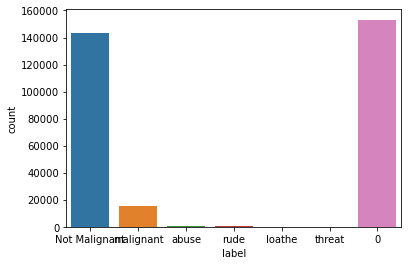

In [45]:
sns.countplot(df['label'])

# processing data

In [46]:
# creating new column that counts the original lenth of the comments
df['Original_comment_length']=df.comment_text.str.len()


In [47]:
df.head()

id                                       comment_text  \
train 0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
      1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
      2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
      3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
      4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

         malignant  highly_malignant  rude  threat  abuse  loathe  \
train 0        0.0               0.0   0.0     0.0    0.0     0.0   
      1        0.0               0.0   0.0     0.0    0.0     0.0   
      2        0.0               0.0   0.0     0.0    0.0     0.0   
      3        0.0               0.0   0.0     0.0    0.0     0.0   
      4        0.0               0.0   0.0     0.0    0.0     0.0   

                 label  Original_comment_length  
train 0  Not Malignant                      264  
      1  Not Malignant                      112  
      2  Not Malignant                      233  
      3  Not Malignant                      622  
      4  Not Malignant                       67

In [48]:
# Importing stopwords
from nltk.corpus import stopwords
words=stopwords.words('english')

In [49]:
# length of original stopwords 
len(words)

179

###### It has been observed that in the stopwords list there are some stopwords that specifies the negativity in the review or positivity in the review, if we remove such words from stopwords then it wont affect the sentiment of original reviews here we have sorted some

In [50]:
# we will eliminate the following list items from stopwords so when we remove stopwords from review this words will not be removed
negative_wordlist = ['no','not','nor','aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]


In [51]:
len(negative_wordlist)

38

In [52]:
# creating final stopwords list which contains all the predefined stopwords and we will remove the negative wordlist items from it
stopwords_list = []
for i in words:
    if i not in negative_wordlist :
        stopwords_list.append(i)

In [53]:
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [54]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
# remove stopwords and punctuations from above sentence

import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stopwords=stopwords_list
punct=string.punctuation

In [56]:
df['comment_text']=df['comment_text'].apply(lambda x: ' '.join( term for term in x.split() if term not in stopwords ))

In [57]:
# converting all the comments to lower case
df['comment_text']=df['comment_text'].str.lower()

In [58]:
# Remove punctuation
df['comment_text'] = df['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['comment_text'] = df['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['comment_text'] = df['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [59]:
df['Cleaned_comment_length']=df.comment_text.str.len()


In [60]:
df.head()

id                                       comment_text  \
train 0  0000997932d777bf  explanation why edits made username hardcore m...   
      1  000103f0d9cfb60f  d aww he matches background colour i m seeming...   
      2  000113f07ec002fd  hey man i m really not trying edit war it s gu...   
      3  0001b41b1c6bb37e  more i can t make real suggestions improvement...   
      4  0001d958c54c6e35    you sir hero any chance remember page that s on   

         malignant  highly_malignant  rude  threat  abuse  loathe  \
train 0        0.0               0.0   0.0     0.0    0.0     0.0   
      1        0.0               0.0   0.0     0.0    0.0     0.0   
      2        0.0               0.0   0.0     0.0    0.0     0.0   
      3        0.0               0.0   0.0     0.0    0.0     0.0   
      4        0.0               0.0   0.0     0.0    0.0     0.0   

                 label  Original_comment_length  Cleaned_comment_length  
train 0  Not Malignant                      264                     202  
      1  Not Malignant                      112                      97  
      2  Not Malignant                      233                     157  
      3  Not Malignant                      622                     418  
      4  Not Malignant                       67                      47

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

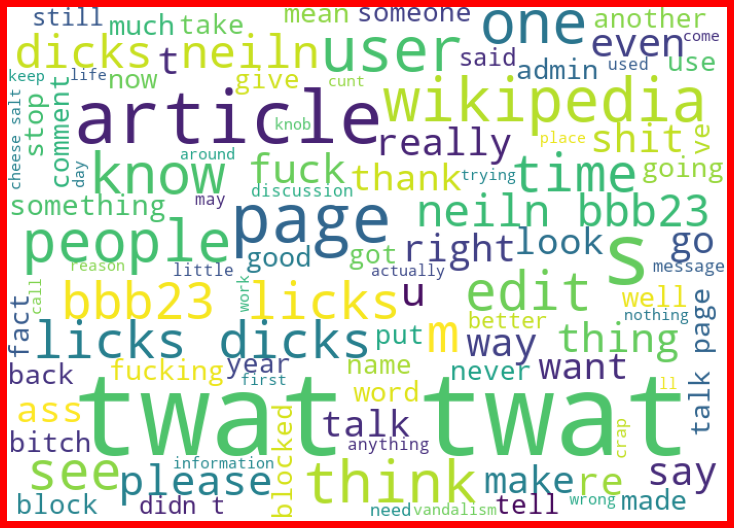

In [62]:
#Getting sense of loud words in Comments
from wordcloud import WordCloud


rude = df['comment_text'][df['label']=='rude']

rude_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(rude))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(rude_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

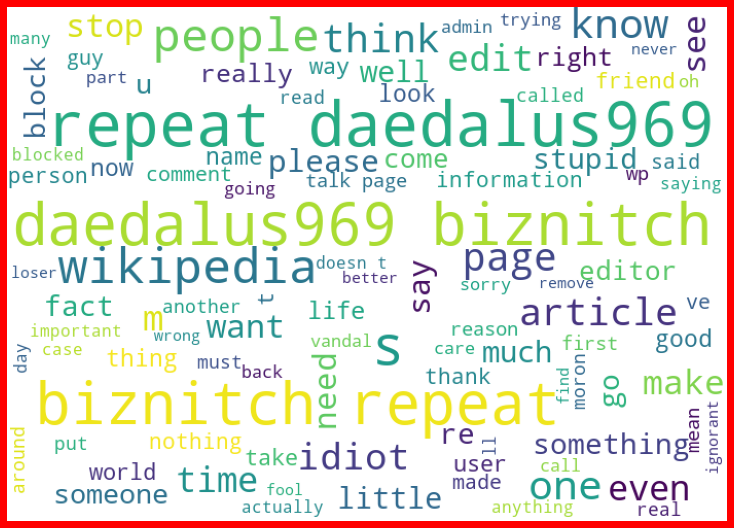

In [63]:
#Getting sense of loud words in Comments
from wordcloud import WordCloud


abuse = df['comment_text'][df['label']=='abuse']

abuse_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(abuse))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(abuse_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

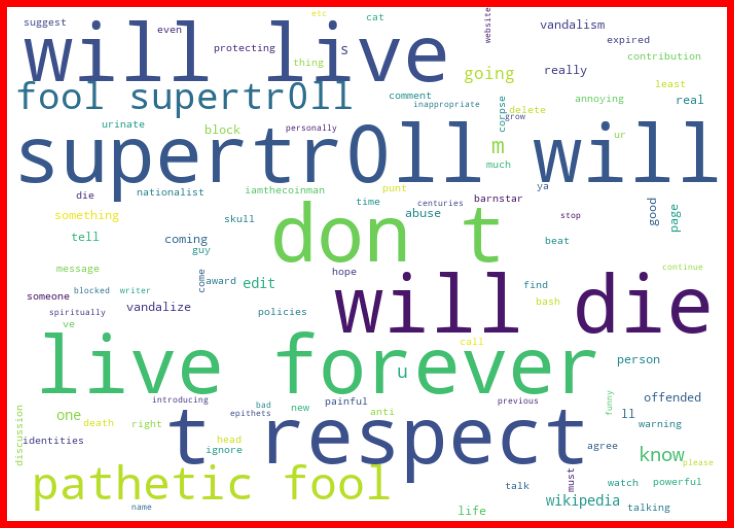

In [64]:
#Getting sense of loud words in Comments
from wordcloud import WordCloud


threat = df['comment_text'][df['label']=='threat']

threat_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(threat))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(threat_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

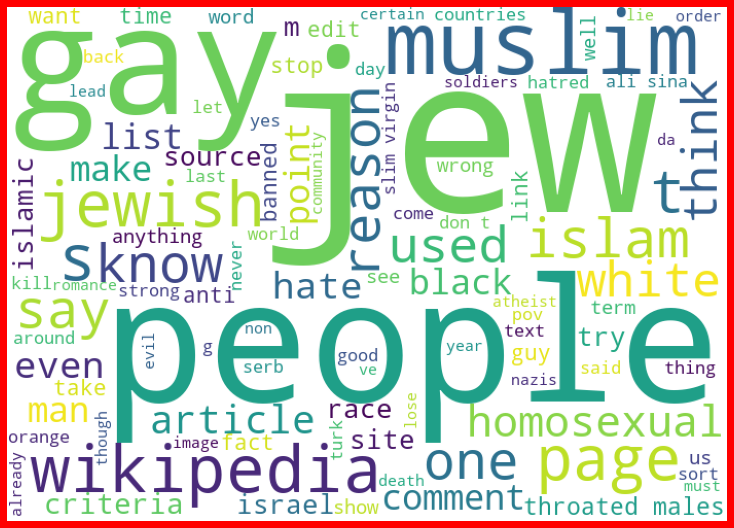

In [65]:
#Getting sense of loud words in Comments
from wordcloud import WordCloud


loathe = df['comment_text'][df['label']=='loathe']

loathe_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(loathe))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(loathe_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

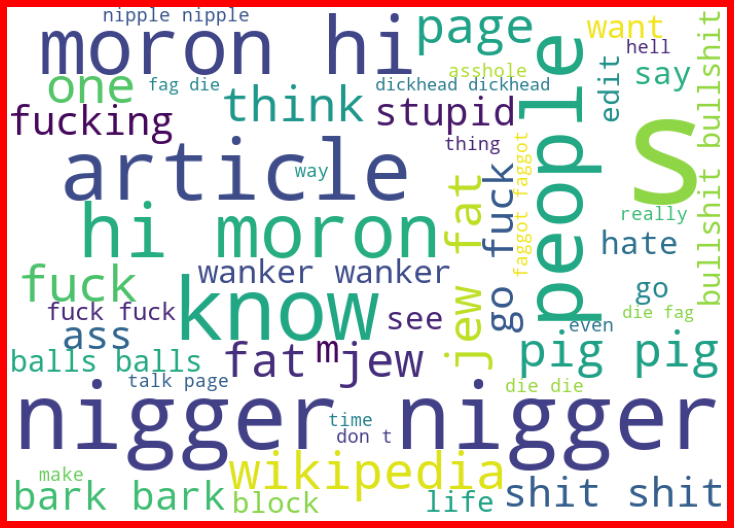

In [66]:
#Getting sense of loud words in Comments
from wordcloud import WordCloud


highly_malignant = df['comment_text'][df['label']=='malignant']

highly_malignant_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(highly_malignant))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(highly_malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Preparing the Target Column i.e., replacing the comments like highly_malignant, loathe, rude, threat, abuse to malignant and 0 to non malignant

In [67]:
df['label']=df['label'].replace('rude','malignant').replace('threat','malignant').replace('threat','malignant').replace('abuse','malignant').replace('loathe','malignant').replace(0,'not_malignant')

In [68]:
df['label'].value_counts()

not_malignant    153164
Not Malignant    143346
malignant         16225
Name: label, dtype: int64

In [69]:
# splitting the train dataset  from df
train_data=df.loc['train']
train_data.shape

(159571, 11)

In [70]:
# splitting the test dataset  from df
data=df.loc['test']
data.shape

(153164, 11)

In [71]:
test_data=data.iloc[:,1]
test_data.head()
print(test_data.shape)

(153164,)


## Label Encoding- malignant with 1 and not malignant with 0

In [72]:
# label encoding the columns manually
train_data['label']=train_data['label'].replace('malignant',1).replace('Not Malignant',0)

In [73]:
train_data['label'].value_counts()

0    143346
1     16225
Name: label, dtype: int64

In [74]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_features=150000)

features=tfidf.fit_transform(train_data['comment_text'])

x = features
y = train_data['label']

In [75]:
x

<159571x150000 sparse matrix of type '<class 'numpy.float64'>'
	with 5025499 stored elements in Compressed Sparse Row format>

In [76]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: label, Length: 159571, dtype: int64


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.22,random_state=42)

In [78]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(124465, 150000)
(124465,)
(35106, 150000)
(35106,)


# Training the Data With MultinomialNB

In [79]:
from sklearn.naive_bayes import MultinomialNB
                                                 
mnb=MultinomialNB()

mnb.fit(x_train,y_train)

y_pred= mnb.predict(x_test)

print ('Accuracy score is  = > ', accuracy_score(y_test,y_pred))

Accuracy score is  = >  0.9184754742779012


In [80]:
from sklearn.metrics import log_loss
probs=mnb.predict_proba(x_test)
loss=log_loss(y_test,probs)
print("Log Loss= ",loss)

Log Loss=  0.30126899988754247


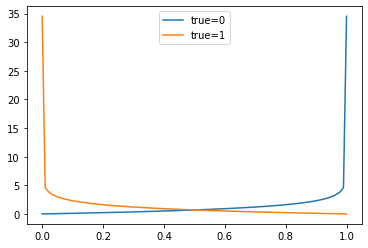

In [81]:

# plot impact of logloss for single forecasts
from sklearn.metrics import log_loss
from matplotlib import pyplot
from numpy import array
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]
# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]
# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]
# plot input to loss
pyplot.plot(yhat, losses_0, label='true=0')
pyplot.plot(yhat, losses_1, label='true=1')
pyplot.legend()
pyplot.show()

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     31542
           1       0.98      0.20      0.33      3564

    accuracy                           0.92     35106
   macro avg       0.95      0.60      0.65     35106
weighted avg       0.92      0.92      0.89     35106



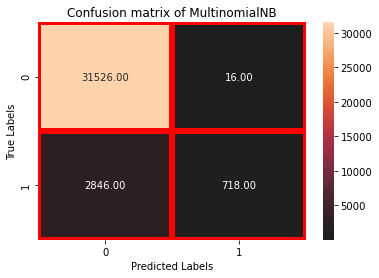

In [83]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0,fmt="0.2f")

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix of MultinomialNB')


plt.show()

## Using LogisticRegression to train model

In [84]:
# Train and predict
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

lg= LogisticRegression()
lg.fit(x_train,y_train)

y_pred= lg.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.9544531622089089


In [85]:
from sklearn.metrics import log_loss
probs= lg.predict_proba(x_test)
loss=log_loss(y_test,probs)
print("Log Loss= ",loss)

Log Loss=  0.12350916457288408


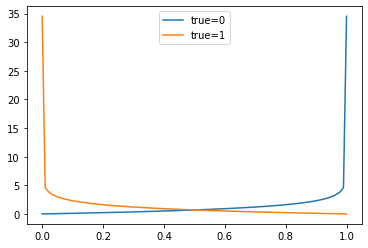

In [86]:

# plot impact of logloss for single forecasts
from sklearn.metrics import log_loss
from matplotlib import pyplot
from numpy import array
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]
# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]
# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]
# plot input to loss
pyplot.plot(yhat, losses_0, label='true=0')
pyplot.plot(yhat, losses_1, label='true=1')
pyplot.legend()
pyplot.show()

In [87]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     35834
           1       0.93      0.60      0.73      4059

    accuracy                           0.95     39893
   macro avg       0.94      0.80      0.85     39893
weighted avg       0.95      0.95      0.95     39893



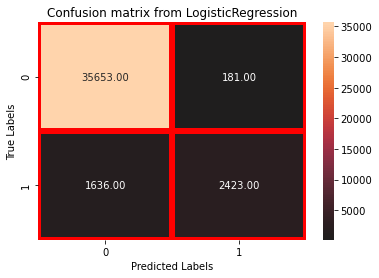

In [88]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0,fmt="0.2f")

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix from LogisticRegression')


plt.show()

## Using RandomForestClassifier to train model

In [89]:
# Train and predict
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred= rfc.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.9453788885268092


In [90]:
from sklearn.metrics import log_loss
probs=rfc.predict_proba(x_test)
loss=log_loss(y_test,probs)
print("Log Loss= ",loss)

Log Loss=  0.14500614054851263


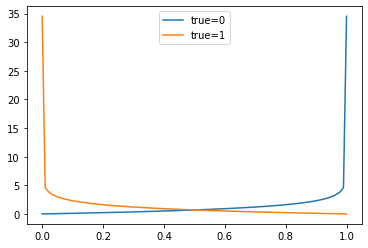

In [91]:

# plot impact of logloss for single forecasts
from sklearn.metrics import log_loss
from matplotlib import pyplot
from numpy import array
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]
# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]
# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]
# plot input to loss
pyplot.plot(yhat, losses_0, label='true=0')
pyplot.plot(yhat, losses_1, label='true=1')
pyplot.legend()
pyplot.show()

In [92]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     35834
           1       0.88      0.53      0.66      4059

    accuracy                           0.95     39893
   macro avg       0.92      0.76      0.82     39893
weighted avg       0.94      0.95      0.94     39893



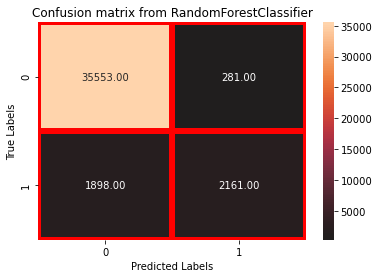

In [93]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0,fmt="0.2f")
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix from RandomForestClassifier')


plt.show()

## Using DecisionTreeClassifier to train model

In [94]:
# Train and predict
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

y_pred= dtc.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.9349259268543354


In [95]:
from sklearn.metrics import log_loss
probs=dtc.predict_proba(x_test)
loss=log_loss(y_test,probs)
print("Log Loss= ",loss)

Log Loss=  1.9675945578442255


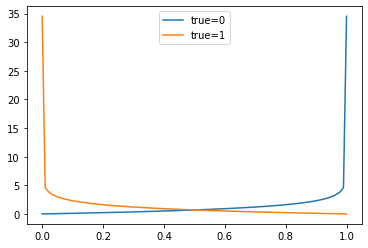

In [96]:

# plot impact of logloss for single forecasts
from sklearn.metrics import log_loss
from matplotlib import pyplot
from numpy import array
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]
# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]
# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]
# plot input to loss
pyplot.plot(yhat, losses_0, label='true=0')
pyplot.plot(yhat, losses_1, label='true=1')
pyplot.legend()
pyplot.show()

In [97]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     35834
           1       0.67      0.71      0.69      4059

    accuracy                           0.93     39893
   macro avg       0.82      0.84      0.83     39893
weighted avg       0.94      0.93      0.94     39893



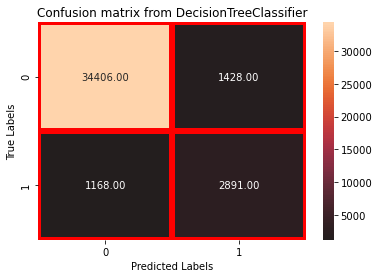

In [98]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0,fmt="0.2f")

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix from DecisionTreeClassifier')


plt.show()

## Using SupportVectorClassifier to train model

In [99]:
# Train and predict
from sklearn.svm import SVC
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

svc=SVC()
svc.fit(x_train,y_train)

y_pred= svc.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.957762013385807


from sklearn.metrics import log_loss
probs=svc.predict_proba(x_test)
loss=log_loss(y_test,probs)
print("Log Loss= ",loss)

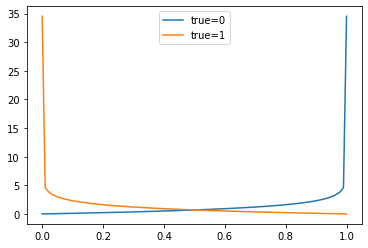

In [100]:

# plot impact of logloss for single forecasts
from sklearn.metrics import log_loss
from matplotlib import pyplot
from numpy import array
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]
# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]
# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]
# plot input to loss
pyplot.plot(yhat, losses_0, label='true=0')
pyplot.plot(yhat, losses_1, label='true=1')
pyplot.legend()
pyplot.show()

In [101]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     35834
           1       0.94      0.62      0.75      4059

    accuracy                           0.96     39893
   macro avg       0.95      0.81      0.86     39893
weighted avg       0.96      0.96      0.95     39893



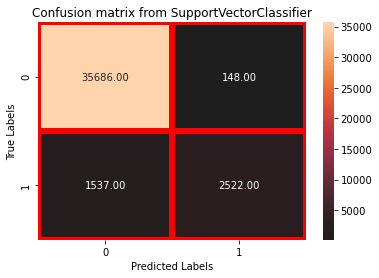

In [102]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0,fmt="0.2f")

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix from SupportVectorClassifier')


plt.show()

# Result after Training Five Models

In [103]:
result={'Logistic':[95,0.12,'96-93','98-73'],'MultinomialNB':[91,0.33,'91-98','96-29'],'RandomForest':[94,0.15,'95-85','97-65'],
        'DecisionTree':[93,2.2,'97-67','96-69'],'Support Vector':[95,'-','96-95','98-75']}

In [104]:
result=pd.DataFrame(result,index=['accuracy','log-loss','precision','f1-score'])

In [105]:
result

,Logistic,MultinomialNB,RandomForest,DecisionTree,Support Vector
accuracy,95,91,94,93,95
log-loss,0.12,0.33,0.15,2.2,-
precision,96-93,91-98,95-85,97-67,96-95
f1-score,98-73,96-29,97-65,96-69,98-75


IT CAN BE CONCLUDED AS

* ACCURACY- Logistic Regression and SupportVectorClassifier are having good accuracy of 95 followed by RandomForestClassifier as 94, DecisionTreeClassifier as 93 and MultinomialNB as 91. so for here 1 vote for LogisticRegression

* LOG-LOSS - (As the model with perfect skill has a log loss score of 0.0. ) Here SupportVectorClassifier is showing no Log-loss because of probability factor=False and DecisionTreeClassifier has highest log-loss of 2.2 
then MultinomialNB has log-loss of 0.33 and the least log loss is of RandomForestClassifier i.e., 0.15 and least than it is of Logistic Regression i.e., 0.12, So here 1 vote for Logiostic Regression and RandomForestClassifier


* PRECISION - Here the first number is precision of 0 and second of 1 , so all the models has got good precisions like at first SupportVector, MultinomialNB, then LogisticRegression , then RandomForest, and at last DecisionTree  . So here 1 vote for SupportVector, MultinomialNB, LogisicRegression and RandomForestClassifier

* F1-SCORE - Here also the first number is f1-score of 0 and second of 1, as it can be observed that f1-score of 0 of all models is pretty good, so using the f1-score to select best model like Support Vector has got good f1-score of 1 as 75, logistic Regression has got 73, followed by DecisionTree as 69, RandomForest as 65 and MultinomialNB as 29
so 1 vote for all models  Logistic, Random, SupportVector, DecisionTree and not for Multinomial NB 

Counting Final Votes

* accuracy - LogisticRegression
* log_loss -  LogisticRegression , RandomForestClassifier
* precision - SupportVector, MultinomialNB, LogisicRegression and RandomForestClassifier
* f1-score -  LogisicRegression, SupportVector, RandomForestClassifierand DecisionTree


###### Logistic Regression and RandomForestClassifier got the more votes so considering both the model whichever model performs the best among these two  will be selected as final model

##### It should be noted that the model was made on the imbalanced data now we will balance the data and select the final one

## Balancing the Imbalanced Data

In [106]:
from collections import Counter
Counter(y_train)

Counter({0: 107512, 1: 12166})

In [107]:
from imblearn.over_sampling import RandomOverSampler

In [108]:
class_weight={0:107512,1:107512}

In [109]:
os=RandomOverSampler(sampling_strategy=class_weight)
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 107512, 1: 12166})
The number of classes after fit Counter({0: 107512, 1: 107512})


In [110]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train_ns,y_train_ns)

RandomForestClassifier()

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22)

In [112]:
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[31468   110]
 [  419  3109]]
0.9849313507662508
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31578
           1       0.97      0.88      0.92      3528

    accuracy                           0.98     35106
   macro avg       0.98      0.94      0.96     35106
weighted avg       0.98      0.98      0.98     35106



In [113]:
print(accuracy_score(y_test,y_pred))

0.9849313507662508


In [114]:
from sklearn.metrics import log_loss
probs=classifier.predict_proba(x_test)
loss=log_loss(y_test,probs)
print("Log Loss= ",loss)

Log Loss=  0.06651460973732294


In [115]:
###### Here we can conclude that Logloss is near to 0 i.e., 0.07 and accuracy is 98% and also precision and f1score are best so selecting it as the best model

from sklearn.model_selection import GridSearchCV
 # creating parameter list to pass in GridSearchCV
parameters ={'penalty':['l1', 'l2', 'elasticnet', 'none'],
            'dual' :[True ,False],
             'class_weight': ['dict','balanced']

            }

from sklearn.model_selection import GridSearchCV
 # creating parameter list to pass in GridSearchCV
parameters ={'n_estimators':[50,100,150,200,250],
            'random_state' :[412,42]}

CGVrf=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

CGVrf.fit(x_train,y_train)

CGVrf.best_params_   

CGVrf_pred=CGVrf.best_estimator_.predict(x_test)

In [116]:
tfidf=TfidfVectorizer(max_features=150000)
test_data =tfidf.fit_transform(test_df['comment_text'])
test_data

<153164x150000 sparse matrix of type '<class 'numpy.float64'>'
	with 5853978 stored elements in Compressed Sparse Row format>

In [117]:
prediction=classifier.predict(test_data)
prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [118]:
p=np.array(prediction)
#result=pd.DataFrame(p,columns='Prediction')
#prediction.to_csv('malignant_comments_prediction.csv')

In [119]:
len(p)

153164

In [129]:
result=pd.DataFrame({})

In [130]:

result['comment_text']=test_df['comment_text']
result['Prediction']=p

In [131]:
result.head()

,comment_text,Prediction
0,Yo bitch Ja Rule is more succesful then you'll...,1
1,== From RfC == \n\n The title is fine as it is...,1
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",1
3,":If you have a look back at the source, the in...",1
4,I don't anonymously edit articles at all.,1


In [132]:
result.to_csv('Malignant comments prediction.csv')

In [121]:

import pickle
filename="Malignant_Comments_Classifier.pkl"
pickle.dump(classifier,open(filename,'wb'))